## The N-Body Problem

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import f90nml

plt.style.use('dark_background')

In [2]:
def read_initial_conditions(file_path):
    with open(file_path, 'r') as file:
        # Read the first line to get dimensions and number of bodies
        first_line = file.readline().strip()
        n_dimensions, n_bodies = map(int, first_line.split())
        
        # Initialize lists to store masses, positions, and velocities
        masses = []
        positions = []
        velocities = []

        # Read the remaining lines to get initial conditions
        for line in file:
            values = list(map(float, line.split()))
            masses.append(values[0])
            positions.append(values[1:n_dimensions + 1])
            velocities.append(values[n_dimensions + 1:])
    
    return n_dimensions, n_bodies, masses, positions, velocities

In [36]:
# Read the namelist file
namelist = f90nml.read('namelist_nbody.nml')

# Extract the parameters of the current namelist
dt = namelist['inputs']['dt']
t_max = namelist['inputs']['t_max']
inits = namelist['inputs']['inits']
method = namelist['inputs']['method']

# Print the parameters
print(f"dt = {dt}")
print(f"t_max = {t_max}")
print(f"inits = {inits}")
print(f"method = {method}")


dt = 0.001
t_max = 10.0
inits = inits4
method = BE


## Results

### Initial Conditions #1

We see that the Backward Euler Method produces a crash at some point, so that the bodies drift apart. The crash was probably caused by not accurate enough calculations of the positions, as the orbits stay stable in the other methods.

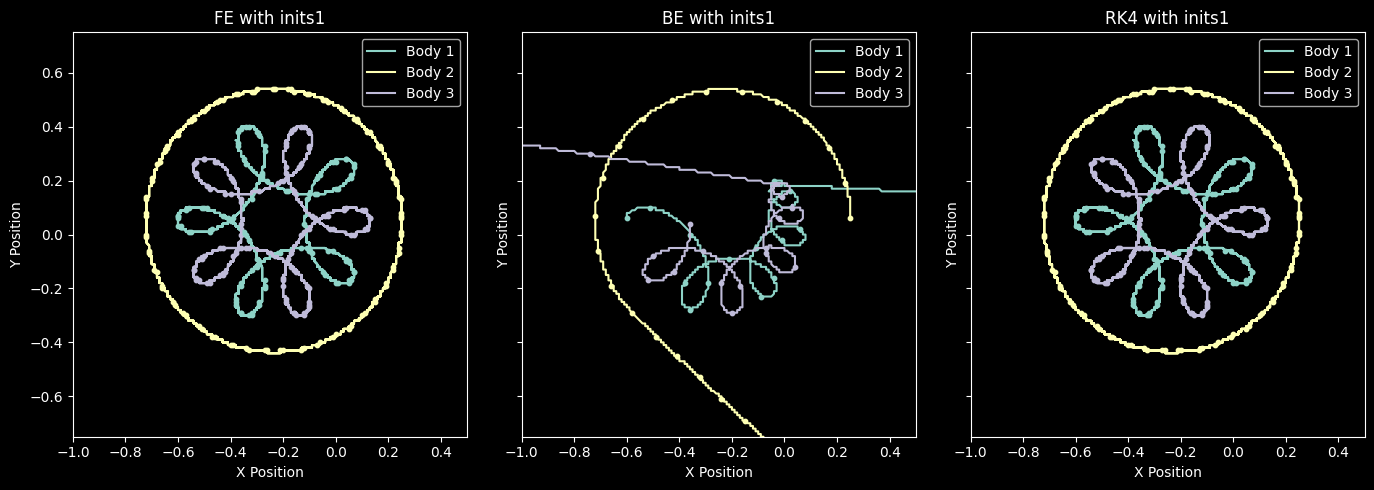

In [30]:
# Read the initial conditions
n_dimensions, n_bodies, masses, positions, velocities = read_initial_conditions("inits1.txt")
methods = ["FE", "BE", "RK4"]  # List of methods
initial_condition = "inits1"  # Single initial condition to compare
d = n_dimensions
k = int(t_max / dt)
n = n_bodies

# Create a figure and a set of subplots for the methods
fig, axes = plt.subplots(1, len(methods), figsize=(14, 5), sharex=True, sharey=True)

# Loop over each method
for j, method in enumerate(methods):
    ax = axes[j]  # Get the specific subplot
    for b in range(1, n+1):
        body = pd.read_csv(f'output/{method}{initial_condition}_body{b}.csv', header=None).to_numpy().reshape(k, d)
        ax.plot(body[1:, 0], body[1:, 1], label=f'Body {b}')  # Use lines for trajectory
        ax.scatter(body[1::100, 0], body[1::100, 1], s=10)  # Add dots every 100 steps
    ax.set_title(f'{method} with {initial_condition}')
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.legend()
    ax.set_xlim(-1, 0.5)  # Set x-axis limits
    ax.set_ylim(-0.75, 0.75)  # Set y-axis limits

# Adjust layout
plt.tight_layout()
plt.show()

### Initial Conditions #2
All methods work and we see that RK4 is the most accurate.

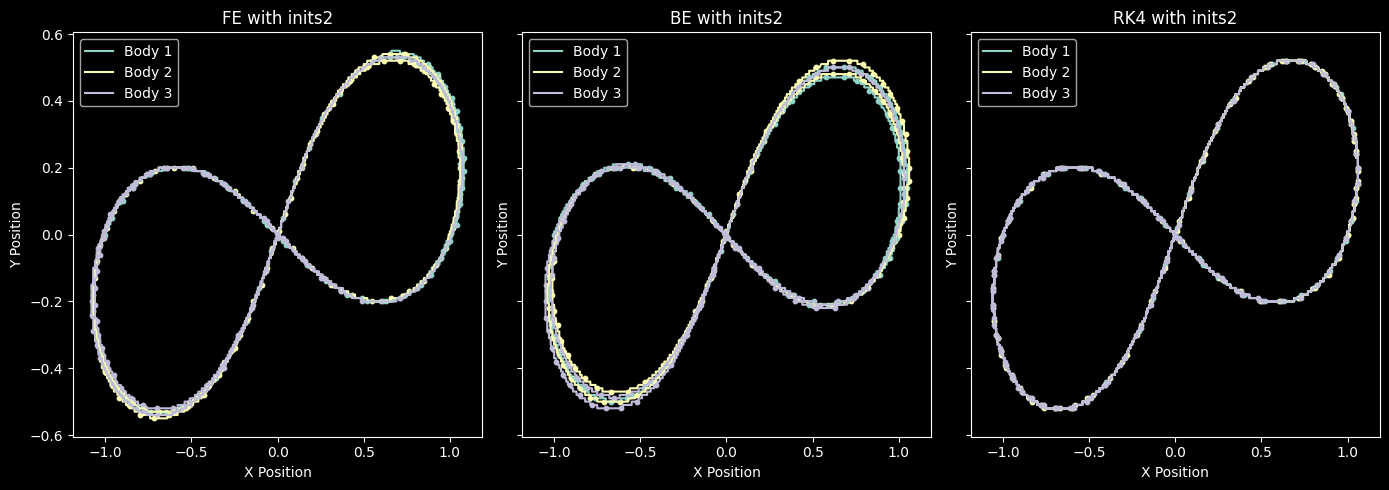

In [31]:
# Read the initial conditions
n_dimensions, n_bodies, masses, positions, velocities = read_initial_conditions("inits2.txt")
methods = ["FE", "BE", "RK4"]  # List of methods
initial_condition = "inits2"  # Single initial condition to compare
d = n_dimensions
k = int(t_max / dt)
n = n_bodies

# Create a figure and a set of subplots for the methods
fig, axes = plt.subplots(1, len(methods), figsize=(14, 5), sharex=True, sharey=True)

# Loop over each method
for j, method in enumerate(methods):
    ax = axes[j]  # Get the specific subplot
    for b in range(1, n+1):
        body = pd.read_csv(f'output/{method}{initial_condition}_body{b}.csv', header=None).to_numpy().reshape(k, d)
        ax.plot(body[1:, 0], body[1:, 1], label=f'Body {b}')  # Use lines for trajectory
        ax.scatter(body[1::100, 0], body[1::100, 1], s=10)  # Add dots every 100 steps
    ax.set_title(f'{method} with {initial_condition}')
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

### Initial Conditions #3
Backward Euler produces again a crash and with Forward Euler the bodies get very slow at one point.

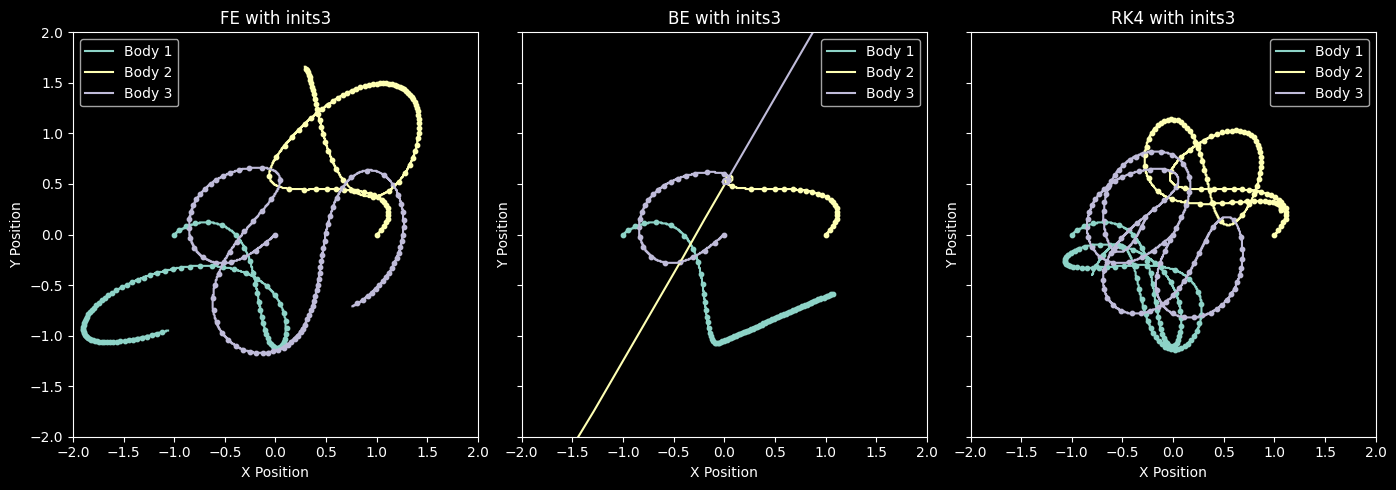

In [32]:
# Read the initial conditions
n_dimensions, n_bodies, masses, positions, velocities = read_initial_conditions("inits3.txt")
methods = ["FE", "BE", "RK4"]  # List of methods
initial_condition = "inits3"  # Single initial condition to compare
d = n_dimensions
k = int(t_max / dt)
n = n_bodies

# Create a figure and a set of subplots for the methods
fig, axes = plt.subplots(1, len(methods), figsize=(14, 5), sharex=True, sharey=True)

# Loop over each method
for j, method in enumerate(methods):
    ax = axes[j]  # Get the specific subplot
    for b in range(1, n+1):
        body = pd.read_csv(f'output/{method}{initial_condition}_body{b}.csv', header=None).to_numpy().reshape(k, d)
        ax.plot(body[1:, 0], body[1:, 1], label=f'Body {b}')  # Use lines for trajectory
        ax.scatter(body[1::100, 0], body[1::100, 1], s=10)  # Add dots every 100 steps
    ax.set_title(f'{method} with {initial_condition}')
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.legend()
    ax.set_xlim(-2, 2)  # Set x-axis limits
    ax.set_ylim(-2, 2)  # Set y-axis limits

# Adjust layout
plt.tight_layout()
plt.show()

### Initial Conditions #4
Same initial conditions as #1 but in 3 dimensions (just as a proof of concept). Unfortunately, I couldn't find initial data that produces more interesting orbits in 3 dimensions.

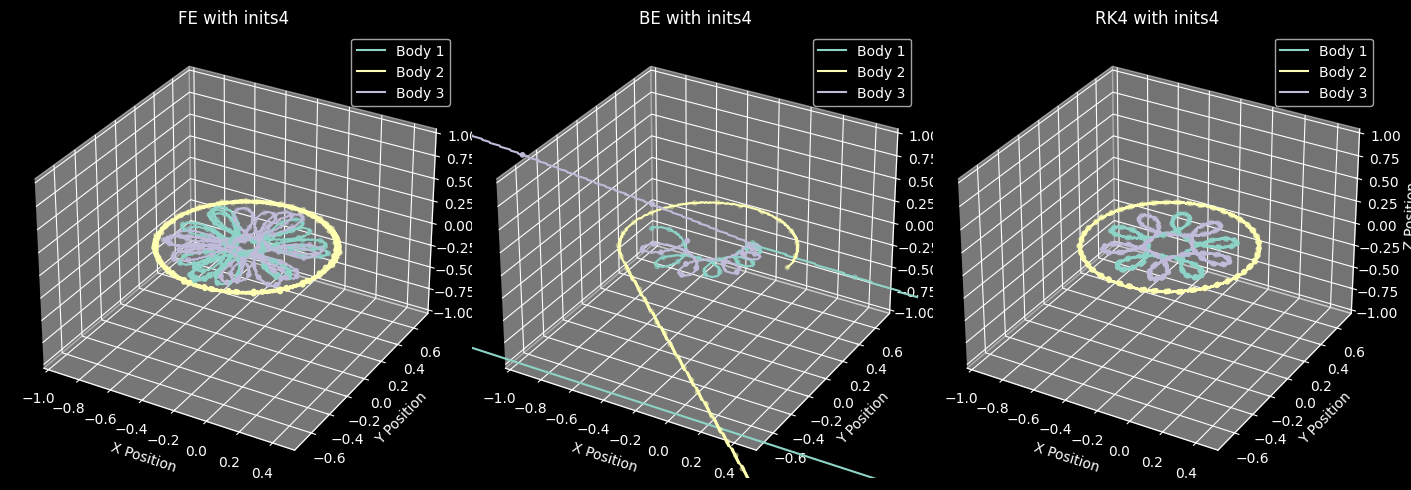

In [34]:
# Read the initial conditions
n_dimensions, n_bodies, masses, positions, velocities = read_initial_conditions("inits4.txt")
methods = ["FE", "BE", "RK4"]  # List of methods
initial_condition = "inits4"  # Single initial condition to compare
d = n_dimensions
k = int(t_max / dt)
n = n_bodies

# Create a figure and a set of subplots for the methods
fig = plt.figure(figsize=(14, 5))

# Loop over each method
for j, method in enumerate(methods):
    ax = fig.add_subplot(1, len(methods), j + 1, projection='3d')  # Create a 3D subplot
    for b in range(1, n + 1):
        body = pd.read_csv(f'output/{method}{initial_condition}_body{b}.csv', header=None).to_numpy().reshape(k, d)
        ax.plot(body[1:, 0], body[1:, 1], body[1:, 2], label=f'Body {b}')  # Use lines for trajectory
        ax.scatter(body[1::100, 0], body[1::100, 1], body[1::100, 2], s=10)  # Add dots every 100 steps
    ax.set_title(f'{method} with {initial_condition}')
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Z Position')
    ax.legend()
    ax.set_xlim(-1, 0.5)  # Set x-axis limits
    ax.set_ylim(-0.75, 0.75)  # Set y-axis limits
    ax.set_zlim(-1, 1)  # Set z-axis limits

# Adjust layout
plt.tight_layout()
plt.show()

### Initial Conditions #5
I also didn't find nice intial conditions for 4 bodies, but the code works.

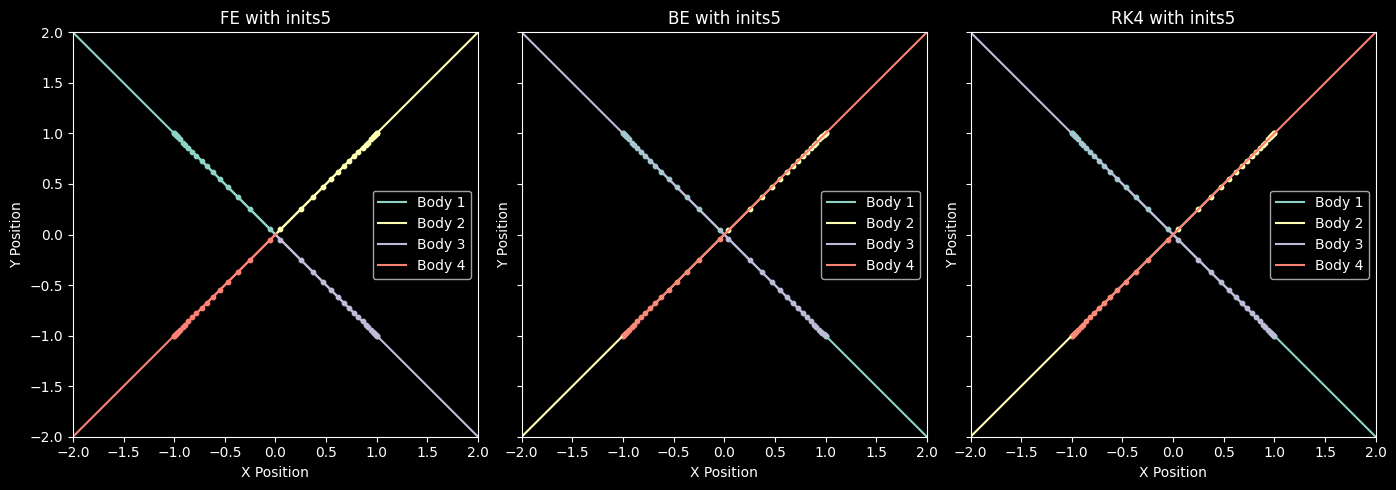

In [41]:
# Read the initial conditions
n_dimensions, n_bodies, masses, positions, velocities = read_initial_conditions("inits5.txt")
methods = ["FE", "BE", "RK4"]  # List of methods
initial_condition = "inits5"  # Single initial condition to compare
d = n_dimensions
k = int(t_max / dt)
n = n_bodies

# Create a figure and a set of subplots for the methods
fig, axes = plt.subplots(1, len(methods), figsize=(14, 5), sharex=True, sharey=True)

# Loop over each method
for j, method in enumerate(methods):
    ax = axes[j]  # Get the specific subplot
    for b in range(1, n+1):
        body = pd.read_csv(f'output/{method}{initial_condition}_body{b}.csv', header=None).to_numpy().reshape(k, d)
        ax.plot(body[1:, 0], body[1:, 1], label=f'Body {b}')  # Use lines for trajectory
        ax.scatter(body[1::100, 0], body[1::100, 1], s=10)  # Add dots every 100 steps
    ax.set_title(f'{method} with {initial_condition}')
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.legend()
    ax.set_xlim(-2, 2)  # Set x-axis limits
    ax.set_ylim(-2, 2)  # Set y-axis limits

# Adjust layout
plt.tight_layout()
plt.show()